In [104]:
# library imports
import csv
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [145]:
# import links file
file = "all-homepage-links-ndp.csv"

In [146]:
# load the NDP plain text as a dataframe
df = pd.read_csv(file, sep = ",", usecols=[0,1,2,3], header=None, error_bad_lines=False, quoting=csv.QUOTE_NONE)
df = df.sort_values(0)

In [147]:
# Calculate those that have been added and taken away
# from the home page between time stamps.

# Find the different crawl dates
times = df[0].unique()

added = []
taken = []
link_measure = []

for y in range (0,len(times)-1):
    # Find each row of data with the correct crawl date
    links_t0 = df.loc[df[0] == times[y]]
    links_t1 = df.loc[df[0] == times[y+1]]
    # Take all the links on the homepage from that crawl
    link_list_t0 = links_t0.iloc[:][2].tolist()
    link_list_t1 = links_t1.iloc[:][2].tolist()
    # How many links did the website have?
    num_links_t0 = len(link_list_t0)
    num_links_t1 = len(link_list_t1)
    
    # Find vector of all links the two crawls have in common
    sim_vec = [i for i in link_list_t0 if i in link_list_t1]
    sim = len(sim_vec) # How many were there?
    
    # This small bit of code can tell which links were added and which were taken away
    links_taken = link_list_t0
    links_added = link_list_t1
    for z in sim_vec:
        links_taken.remove(z)
        links_added.remove(z)
    print(links_taken)
    print(links_added)
    
    # Append the added list so we can plot it
    added.append(num_links_t0 - sim)
    taken.append(num_links_t1 - sim)
    
    # Normalised measure
    link_measure.append(1 - (2*sim/(num_links_t0+num_links_t1)))

[]
[]
[]
['https://twitter.com/intent/user?user_id=363997684)']
['https://twitter.com/intent/user?user_id=363997684)']
[]
[]
[]
['http://www.ndp.ca/endp-subscribe)', 'http://www.ndp.ca/app)', 'http://twitter.com/search?q=%23NDP)', 'http://www.ndp.ca/volunteer)', 'http://twitter.com/search?q=%23cdnpoli)']
['http://twitter.com/search?q=%23NDPaction)']
['http://twitter.com/search?q=%23NDPaction)']
['http://twitter.com/search?q=%23NDP)']
[]
['http://twitter.com/search?q=%23cdnpoli)', 'https://twitter.com/intent/user?user_id=363997684)']
[]
[]
['http://twitter.com/search?q=%23cdnpoli)']
[]


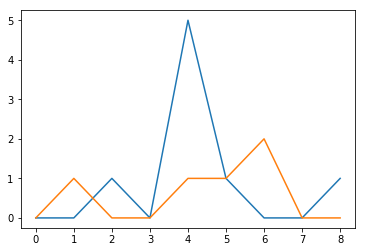

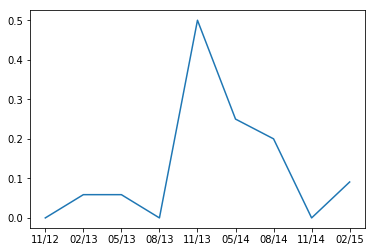

In [148]:
plt.plot(added)
plt.plot(taken)
plt.show()

my_xticks = []
for i in range (0,len(times)-1):
    my_xticks.append(str(times[i][6:8] + "/" + times[i][4:6]))
plt.xticks(range(len(times)-1), my_xticks)
plt.plot(times[0:-1],link_measure)
plt.show()